In [3]:
import pandas as pd

In [6]:
df = pd.read_csv('tree.csv')
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Outdoor,Yes
2,3,Cloudy,Warm,Indoor,No
3,4,Sunny,Warm,Indoor,No
4,5,Sunny,Cold,Outdoor,Yes


In [7]:
df = df.drop('Days', axis=1)
df

,Outlook,Temprature,Routine,Wear Jacket
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Outdoor,Yes
2,Cloudy,Warm,Indoor,No
3,Sunny,Warm,Indoor,No
4,Sunny,Cold,Outdoor,Yes
5,Cloudy,Warm,Indoor,No
6,Cloudy,Warm,Outdoor,No
7,Cloudy,Cold,Outdoor,Yes
8,Sunny,Cold,Indoor,No
9,Cloudy,Warm,Outdoor,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temprature   14 non-null     object
 2   Routine      14 non-null     object
 3   Wear Jacket  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [9]:
y = df['Wear Jacket']
y

0      No
1     Yes
2      No
3      No
4     Yes
5      No
6      No
7     Yes
8      No
9      No
10    Yes
11     No
12     No
13     No
Name: Wear Jacket, dtype: object

In [10]:
x = df.drop('Wear Jacket', axis=1)
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Outdoor
2,Cloudy,Warm,Indoor
3,Sunny,Warm,Indoor
4,Sunny,Cold,Outdoor
5,Cloudy,Warm,Indoor
6,Cloudy,Warm,Outdoor
7,Cloudy,Cold,Outdoor
8,Sunny,Cold,Indoor
9,Cloudy,Warm,Outdoor


# Data Preprocessing

In [11]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
x.Outlook = le.fit_transform(x['Outlook'])
x

,Outlook,Temprature,Routine
0,1,Cold,Indoor
1,0,Cold,Outdoor
2,0,Warm,Indoor
3,1,Warm,Indoor
4,1,Cold,Outdoor
5,0,Warm,Indoor
6,0,Warm,Outdoor
7,0,Cold,Outdoor
8,1,Cold,Indoor
9,0,Warm,Outdoor


In [13]:
x.Temprature = le.fit_transform(x['Temprature'])
x.Routine = le.fit_transform(x['Routine'])
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,1
2,0,1,0
3,1,1,0
4,1,0,1
5,0,1,0
6,0,1,1
7,0,0,1
8,1,0,0
9,0,1,1


# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [15]:
clf.fit(x,y) # train with full dataset

DecisionTreeClassifier()

In [16]:
clf.predict([[1,0,0]]) # 1=sunny, 0=cold, 0=indoor

array(['No'], dtype=object)

In [27]:
clf.predict([[1,1,1]]) # 1=sunny, 1=warm, 1=outdoor

array(['No'], dtype=object)

In [28]:
clf.predict([[1,0,1]]) # 1=sunny, 0=cold, 1=outdoor

array(['Yes'], dtype=object)

# Visualize Tree

[Text(200.88000000000002, 181.2, 'X[1] <= 0.5\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(133.92000000000002, 108.72, 'X[2] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

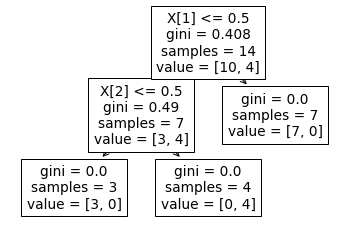

In [29]:
from sklearn import tree
tree.plot_tree(clf)

In [25]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

[Text(200.88000000000002, 181.2, 'Temprature <= 0.5\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(133.92000000000002, 108.72, 'Routine <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

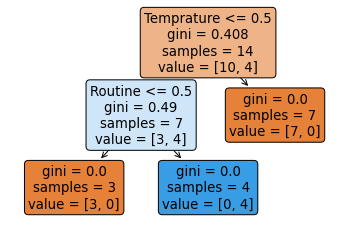

In [30]:
tree.plot_tree(clf, filled=True, rounded=True, feature_names=x.columns)

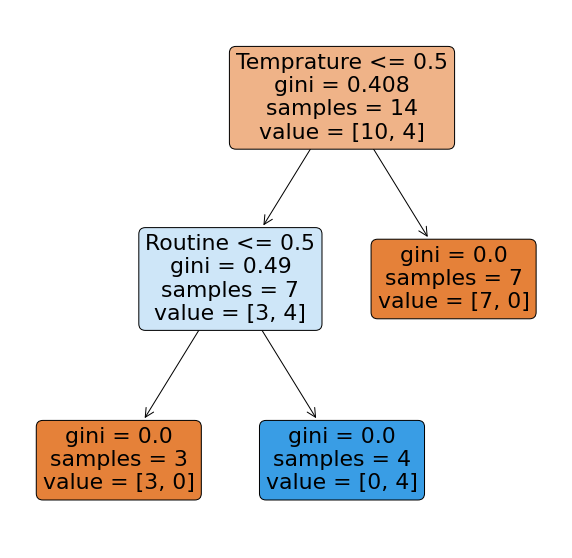

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=x.columns)
plt.savefig('tree.png')